In [1]:
import os
import os.path as osp

from argparse import Namespace

from transition_amr_parser.utils import print_log
from transition_amr_parser.io import writer, read_propbank, read_amr
from transition_amr_parser.state_machine import (
    AMRStateMachine,
    get_spacy_lemmatizer,
    entity_rule_stats,
    entity_rule_totals,
    entity_rule_fails
)

### data path

In [10]:
with open(train_amr_path, 'r') as f:
    train_amr = [line.strip() for line in f]
with open(dev_amr_path, 'r') as f:
    dev_amr = [line.strip() for line in f]

In [2]:
ldc2016_dir = '/dccstor/ykt-parse/SHARED/CORPORA/AMR/LDC2016T10_preprocessed_tahira'
ldc2017_dir = '/dccstor/ykt-parse/SHARED/CORPORA/AMR/LDC2017T10_preprocessed_TAP_v0.0.1'

train_amr_path = osp.join(ldc2016_dir, 'jkaln_2016_scr.txt')
dev_amr_path = osp.join(ldc2017_dir, 'dev.txt')

In [12]:
print(len(train_amr))
print(len(dev_amr))

1704967
77224


In [4]:
args = Namespace(in_amr=dev_amr_path)

### read in data and explore 

In [5]:
# Load AMR (replace some unicode characters)
corpus = read_amr(args.in_amr, unicode_fixes=True)

2020-07-03 18:13:34 [amr] Starts reading data
2020-07-03 18:13:34 [amr] Training Data
2020-07-03 18:13:34 [amr] Number of labels: 109
2020-07-03 18:13:34 [amr] Number of nodes: 3875
2020-07-03 18:13:34 [amr] Number of words: 5385
2020-07-03 18:13:34 [amr] Number of sentences: 1368


In [73]:
dir(corpus)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'amrs',
 'amrs_dev',
 'chars2Ints',
 'labels2Ints',
 'load_amrs',
 'nodes2Ints',
 'special_tokens',
 'words2Ints']

In [6]:
vars(corpus.amrs[0])

{'tokens': ['There',
  'are',
  'many',
  'who',
  'have',
  'a',
  'sense',
  'of',
  'urgency',
  ',',
  'quietly',
  'watching',
  'how',
  'things',
  'develop',
  ',',
  'you',
  'are',
  'dragons',
  'coiling',
  ',',
  'you',
  'are',
  'tigers',
  'crouching',
  ',',
  'I',
  'admire',
  'noble',
  '-',
  'minded',
  'patriots',
  '.'],
 'root': '0',
 'nodes': {'0': 'multi-sentence',
  '0.0': 'many',
  '0.0.0': 'sense-01',
  '0.0.0.0': 'urgency',
  '0.0.0.1': 'watch-01',
  '0.0.0.1.0': 'thing',
  '0.0.0.1.0.0': 'develop-02',
  '0.0.0.1.0.0.0': 'thing',
  '0.0.0.1.1': 'quiet-04',
  '0.1': 'dragon',
  '0.1.0': 'you',
  '0.1.1': 'coil-01',
  '0.2': 'tiger',
  '0.2.0': 'you',
  '0.2.1': 'crouch-01',
  '0.3': 'admire-01',
  '0.3.0': 'i',
  '0.3.1': 'patriot',
  '0.3.1.0': 'mind-04',
  '0.3.1.0.0': 'noble'},
 'edges': [('0.3', ':ARG0', '0.3.0'),
  ('0.3', ':ARG1', '0.3.1'),
  ('0.0.0.1.0.0', ':ARG0', '0.0.0.1.0.0.0'),
  ('0.1', ':ARG0-of', '0.1.1'),
  ('0.1', ':domain', '0.1.0'),
  (

In [49]:
aln_nw = []
for amr in corpus.amrs:
    for k, v in amr.alignments.items():
        aln_nw.append(len(v)) 

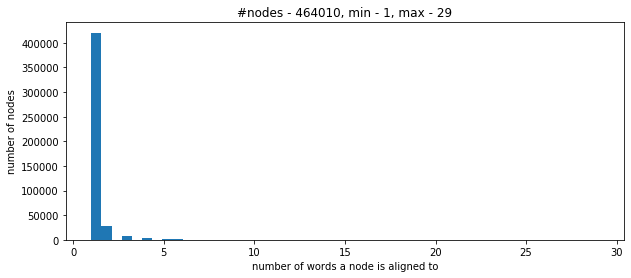

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(aln_nw, bins=50)
plt.title(f'#nodes - {len(aln_nw)}, min - {min(aln_nw)}, max - {max(aln_nw)}')
plt.xlabel('number of words a node is aligned to')
plt.ylabel('number of nodes')
plt.show()

In [88]:
dir(corpus.amrs[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alignments',
 'alignmentsToken2Node',
 'copy',
 'edges',
 'findSubGraph',
 'nodes',
 'root',
 'score',
 'toJAMRString',
 'token2node_memo',
 'tokens']

In [96]:
corpus.amrs[0].alignmentsToken2Node(4)

[]

In [97]:
vars(corpus.amrs[0])

{'tokens': ['There',
  'are',
  'many',
  'who',
  'have',
  'a',
  'sense',
  'of',
  'urgency',
  ',',
  'quietly',
  'watching',
  'how',
  'things',
  'develop',
  ',',
  'you',
  'are',
  'dragons',
  'coiling',
  ',',
  'you',
  'are',
  'tigers',
  'crouching',
  ',',
  'I',
  'admire',
  'noble',
  '-',
  'minded',
  'patriots',
  '.'],
 'root': '0',
 'nodes': {'0': 'multi-sentence',
  '0.0': 'many',
  '0.0.0': 'sense-01',
  '0.0.0.0': 'urgency',
  '0.0.0.1': 'watch-01',
  '0.0.0.1.0': 'thing',
  '0.0.0.1.0.0': 'develop-02',
  '0.0.0.1.0.0.0': 'thing',
  '0.0.0.1.1': 'quiet-04',
  '0.1': 'dragon',
  '0.1.0': 'you',
  '0.1.1': 'coil-01',
  '0.2': 'tiger',
  '0.2.0': 'you',
  '0.2.1': 'crouch-01',
  '0.3': 'admire-01',
  '0.3.0': 'i',
  '0.3.1': 'patriot',
  '0.3.1.0': 'mind-04',
  '0.3.1.0.0': 'noble'},
 'edges': [('0.3', ':ARG0', '0.3.0'),
  ('0.3', ':ARG1', '0.3.1'),
  ('0.0.0.1.0.0', ':ARG0', '0.0.0.1.0.0.0'),
  ('0.1', ':ARG0-of', '0.1.1'),
  ('0.1', ':domain', '0.1.0'),
  (

### test state machine 

In [1]:
from transition_amr_parser.o7_state_machine import AMRStateMachine

In [2]:
import importlib
importlib.reload(transition_amr_parser.o7_state_machine)

NameError: name 'transition_amr_parser' is not defined

In [2]:
tokens = \
['There',
  'are',
  'many',
  'who',
  'have',
  'a',
  'sense',
  'of',
  'urgency',
  ',',
  'quietly',
  'watching',
  'how',
  'things',
  'develop',
  ',',
  'you',
  'are',
  'dragons',
  'coiling',
  ',',
  'you',
  'are',
  'tigers',
  'crouching',
  ',',
  'I',
  'admire',
  'noble',
  '-',
  'minded',
  'patriots',
  '.']

In [74]:
vars(corpus)

{'amrs': [<transition_amr_parser.amr.AMR at 0x2b25630cc6a0>,
  ...],
 'amrs_dev': [],
 'nodes2Ints': {'multi-sentence': 0,
  'many': 1,
  'sense-01': 2,
  'urgency': 3,
  'watch-01': 4,
  'thing': 5,
  'develop-02': 6,
  'quiet-04': 7,
  'dragon': 8,
  'you': 9,
  'coil-01': 10,
  'tiger': 11,
  'crouch-01': 12,
  'admire-01': 13,
  'i': 14,
  'patriot': 15,
  'mind-04': 16,
  'noble': 17,
  'give-01': 18,
  'interrogative': 19,
  'history': 20,
  'lesson': 21,
  'too': 22,
  'we': 23,
  'and': 24,
  '530': 25,
  '412': 26,
  '64': 27,
  'look-01': 28,
  'suffer-01': 29,
  'person': 30,
  'ordinary': 31,
  'fish': 32,
  'salt-01': 33,
  'still': 34,
  'even-if': 35,
  'turn-01': 36,
  'body': 37,
  'over': 38,
  'or': 39,
  'call-01': 40,
  'slave': 41,
  'foreign': 42,
  'accuse-01': 43,
  'revere-01': 44,
  'fascinate-01': 45,
  'express-01': 46,
  'view-02': 47,
  'differ-02': 48,
  'somewhat': 49,
  'tradition': 50,
  'criticize-01': 51,
  'slight': 52,
  'free-04': 53,
  'slash': 

In [24]:
sm = AMRStateMachine(tokens)

In [15]:
actions = ['REDUCE', 'REDUCE', 'PRED(many)', 'SHIFT', 'REDUCE', 'PRED(have)', 'LA(2,ARG0)', 'SHIFT', 'REDUCE',
           'PRED(sense)', 'SHIFT', 'REDUCE', 'PRED(urgency)', 'RA(5,ARG1)', 'SHIFT', 'REDUCE']

sm.apply_actions(actions)
# sm.apply_action('LA(2,ARG0)')

In [16]:
vars(sm)

{'tokens': ['There',
  'are',
  'many',
  'who',
  'have',
  'a',
  'sense',
  'of',
  'urgency',
  ',',
  'quietly',
  'watching',
  'how',
  'things',
  'develop',
  ',',
  'you',
  'are',
  'dragons',
  'coiling',
  ',',
  'you',
  'are',
  'tigers',
  'crouching',
  ',',
  'I',
  'admire',
  'noble',
  '-',
  'minded',
  'patriots',
  '.',
  '<ROOT>'],
 'amr_graph': True,
 'spacy_lemmatizer': None,
 'lemmas': None,
 'time_step': 16,
 'is_closed': False,
 'current_pos': 10,
 'amr': <transition_amr_parser.amr.AMR at 0x2ad5271174e0>,
 'new_id': 34,
 'actions_to_nodes': [None,
  None,
  2,
  None,
  None,
  4,
  None,
  None,
  None,
  6,
  None,
  None,
  8,
  None,
  None,
  None],
 'actions': ['REDUCE',
  'REDUCE',
  'PRED(many)',
  'SHIFT',
  'REDUCE',
  'PRED(have)',
  'LA(2,:ARG0)',
  'SHIFT',
  'REDUCE',
  'PRED(sense)',
  'SHIFT',
  'REDUCE',
  'PRED(urgency)',
  'RA(5,:ARG1)',
  'SHIFT',
  'REDUCE'],
 'labels': [],
 'labelsA': [],
 'predicates': [],
 'alignments': {2: 2, 4: 4,

In [17]:
vars(sm.amr)

{'tokens': ['There',
  'are',
  'many',
  'who',
  'have',
  'a',
  'sense',
  'of',
  'urgency',
  ',',
  'quietly',
  'watching',
  'how',
  'things',
  'develop',
  ',',
  'you',
  'are',
  'dragons',
  'coiling',
  ',',
  'you',
  'are',
  'tigers',
  'crouching',
  ',',
  'I',
  'admire',
  'noble',
  '-',
  'minded',
  'patriots',
  '.',
  '<ROOT>'],
 'root': '',
 'nodes': {2: 'many',
  4: 'have',
  6: 'sense',
  8: 'urgency',
  10: 'quietly',
  11: 'watching',
  12: 'how',
  13: 'things',
  14: 'develop',
  15: ',',
  16: 'you',
  17: 'are',
  18: 'dragons',
  19: 'coiling',
  20: ',',
  21: 'you',
  22: 'are',
  23: 'tigers',
  24: 'crouching',
  25: ',',
  26: 'I',
  27: 'admire',
  28: 'noble',
  29: '-',
  30: 'minded',
  31: 'patriots',
  32: '.',
  -1: '<ROOT>'},
 'edges': [(4, ':ARG0', 2), (4, ':ARG1', 8)],
 'alignments': {},
 'score': 0.0,
 'token2node_memo': {}}

In [2]:
sm = AMRStateMachine('New York City is nice'.split())

In [3]:
actions = ['MERGE', 'MERGE', 'ENTITY(city)', 'SHIFT', 'REDUCE', 'PRED(nice)', 'LA(2,ARG0)', 'SHIFT', 'LA(5,root)', 'CLOSE']

sm.apply_actions(actions)

> /dccstor/ykt-parse/AMR/jiawei2020/transition-amr-parser/transition_amr_parser/o7_state_machine.py(427)connectGraph()
-> descendents = {n: {n} for n in self.amr.nodes}
(Pdb) assigned_root
4
(Pdb) n
> /dccstor/ykt-parse/AMR/jiawei2020/transition-amr-parser/transition_amr_parser/o7_state_machine.py(428)connectGraph()
-> potential_roots = [n for n in self.amr.nodes]
(Pdb) n
> /dccstor/ykt-parse/AMR/jiawei2020/transition-amr-parser/transition_amr_parser/o7_state_machine.py(429)connectGraph()
-> for x, r, y in self.amr.edges:
(Pdb) n
> /dccstor/ykt-parse/AMR/jiawei2020/transition-amr-parser/transition_amr_parser/o7_state_machine.py(430)connectGraph()
-> if y in potential_roots and x not in descendents[y]:
(Pdb) n
> /dccstor/ykt-parse/AMR/jiawei2020/transition-amr-parser/transition_amr_parser/o7_state_machine.py(431)connectGraph()
-> potential_roots.remove(y)
(Pdb) n
> /dccstor/ykt-parse/AMR/jiawei2020/transition-amr-parser/transition_amr_parser/o7_state_machine.py(432)connectGraph()
-> des

In [4]:
vars(sm)

{'tokens': ['New', 'York', 'City', 'is', 'nice', '<ROOT>'],
 'amr_graph': True,
 'spacy_lemmatizer': None,
 'lemmas': None,
 'time_step': 10,
 'is_closed': True,
 'current_pos': 5,
 'amr': <transition_amr_parser.amr.AMR at 0x2b42ee2ae208>,
 'new_id': 7,
 'actions_to_nodes': [None, None, 2, None, None, 4, None, None, None, None],
 'actions': ['MERGE',
  'MERGE',
  'ENTITY(city)',
  'SHIFT',
  'REDUCE',
  'PRED(nice)',
  'LA(2,:ARG0)',
  'SHIFT',
  'LA(5,root)',
  'CLOSE'],
 'labels': [],
 'labelsA': [],
 'predicates': [],
 'alignments': {2: [0, 1, 2], 4: 4},
 'merged_tokens': {1: [0, 1], 2: [0, 1, 2]},
 'entities': [2],
 'is_confirmed': {-1},
 'swapped_words': {}}

In [5]:
vars(sm.amr)

{'tokens': ['New', 'York', 'City', 'is', 'nice', '<ROOT>'],
 'root': 4,
 'nodes': {2: '(city)', 4: 'nice', 6: 'New,York,City'},
 'edges': [(2, 'entity', 6), (4, ':ARG0', 2)],
 'alignments': {2: [1, 2, 3], 4: 5},
 'score': 0.0,
 'token2node_memo': {}}

In [1]:
print(sm.amr.toJAMRString())

NameError: name 'sm' is not defined

In [5]:
def fc():
    for i in range(10):
        yield i

In [16]:
xx = ['ab', 'cd', 'ed']
for a in xx:
    a = '11'

In [18]:
xx

['ab', 'cd', 'ed']

### see train.rules

In [9]:
%%bash

ls oracles/o3+Word100

dev.actions
dev.en
oracle_dev.amr
oracle_test.amr
oracle_train.amr
test.actions
test.en
train.actions
train.en
train.multitask_words
train.rules.json


In [19]:
import json

rules = json.load(open('oracles/old_o3+Word100/train.rules.json', 'r'))

In [20]:
rules.keys()

dict_keys(['possible_predicates', 'action_vocabulary', 'addnode_counts', 'action2idx', 'pred2idx', 'labelsO2idx', 'labelsA2idx', 'char2idx', 'word2idx', 'node2idx', 'word_counter'])

In [21]:
rules['possible_predicates']

{'Establishing': {'establish-01': 2},
 'Models': {'model': 1},
 'Industrial': {'industry': 7},
 'Innovation': {'innovate-01': 1},
 'After': {'after': 104, 'after-all': 20},
 'competitor': {'company': 1},
 'invented': {'invent-01': 7},
 'front': {'front': 31, 'in-front-of': 12, 'up-front-00': 1},
 'loading': {'load-01': 6},
 'washing': {'wash-01': 6},
 'machine': {'machine': 25},
 'company': {'compete-02': 1,
  'company': 116,
  'interview-01': 1,
  'compare-01': 1},
 'believed': {'believe-01': 56},
 'each': {'each': 102, 'rate-entity-91': 13, 'and': 2, 'treat-01': 1},
 'ability': {'capable-01': 45, 'possible-01': 12, 'ability': 7},
 'innovation': {'innovate-01': 10},
 'and': {'and': 10762,
  '"and"': 5,
  'by-oneself': 1,
  'infer-01': 1,
  '25': 1,
  'stability': 1,
  'person': 1},
 'formulated': {'formulate-01': 2},
 'strategic': {'strategy': 19, 'strategic': 14},
 'countermeasures': {'countermeasure': 3, 'measure-02': 1},
 'industry': {'industry': 79, 'industrious': 1},
 '1.': {'1':

In [23]:
a = Counter(rules['possible_predicates'])

In [29]:
a

Counter({'Establishing': {'establish-01': 2},
         'Models': {'model': 1},
         'Industrial': {'industry': 7},
         'Innovation': {'innovate-01': 1},
         'After': {'after': 104, 'after-all': 20},
         'competitor': {'company': 1},
         'invented': {'invent-01': 7},
         'front': {'front': 31, 'in-front-of': 12, 'up-front-00': 1},
         'loading': {'load-01': 6},
         'washing': {'wash-01': 6},
         'machine': {'machine': 25},
         'company': {'compete-02': 1,
          'company': 116,
          'interview-01': 1,
          'compare-01': 1},
         'believed': {'believe-01': 56},
         'each': {'each': 102, 'rate-entity-91': 13, 'and': 2, 'treat-01': 1},
         'ability': {'capable-01': 45, 'possible-01': 12, 'ability': 7},
         'innovation': {'innovate-01': 10},
         'and': {'and': 10762,
          '"and"': 5,
          'by-oneself': 1,
          'infer-01': 1,
          '25': 1,
          'stability': 1,
          'person': 1}

In [18]:
len(list(rules['possible_predicates'].keys()))

24298

In [20]:
len(list(rules['pred2idx'].keys()))

13944

In [21]:
rules['pred2idx']

{'<pad>': 0,
 '_': 1,
 'establish-01': 2,
 'model': 3,
 'industry': 4,
 'innovate-01': 5,
 'after': 6,
 'company': 7,
 'invent-01': 8,
 'front': 9,
 'load-01': 10,
 'wash-01': 11,
 'machine': 12,
 'compete-02': 13,
 'believe-01': 14,
 'each': 15,
 'capable-01': 16,
 'and': 17,
 'formulate-01': 18,
 'strategy': 19,
 'countermeasure': 20,
 '1': 21,
 'fund': 22,
 'at-most': 23,
 'amount-01': 24,
 '1000': 25,
 '2': 26,
 'choose-01': 27,
 '100': 28,
 'concept': 29,
 'encourage-01': 30,
 'research-01': 31,
 'develop-02': 32,
 'work-01': 33,
 'or': 34,
 'spare': 35,
 'time': 36,
 '3': 37,
 'they': 38,
 'pick-out-03': 39,
 '50': 40,
 'assess-01': 41,
 'committee': 42,
 'since': 43,
 'earthquake': 44,
 'start-01': 45,
 'point': 46,
 'construct-01': 47,
 'standard': 48,
 'mainland': 49,
 'same-01': 50,
 'magnitude': 51,
 'building': 52,
 'recommend-01': 53,
 'preserve-01': 54,
 'basic': 55,
 'frame': 56,
 'collapse-01': 57,
 'contrast-01': 58,
 'most': 59,
 'include-91': 60,
 'this': 61,
 'hard-

In [22]:
type(rules['possible_predicates'])

dict

In [30]:
%%bash

ls oracles/o7_o3align+Word100

dev.actions
dev.en
oracle_dev.amr
oracle_test.amr
oracle_train.amr
test.actions
test.en
train.actions
train.en
train.multitask_words
train.rules.json


In [35]:
import json

rules = json.load(open('oracles/o7_o5align+Word100/train.rules.json', 'r'))

In [36]:
rules.keys()

dict_keys(['possible_predicates', 'action_vocabulary', 'addnode_counts', 'action2idx', 'pred2idx', 'labelsO2idx', 'labelsA2idx', 'char2idx', 'word2idx', 'node2idx', 'word_counter'])

In [37]:
rules['possible_predicates']

{'Models': {'model': 1},
 'Industrial': {'industry': 7},
 'Innovation': {'innovate-01': 1},
 'competitor': {'company': 1},
 'washing': {'wash-01': 6},
 'company': {'compete-02': 1, 'compare-01': 1},
 'ability': {'capable-01': 45, 'possible-01': 12},
 'for': {'chief': 1,
  'executive': 1,
  'have-purpose-91': 9,
  'cause-01': 205,
  'contrast-01': 7,
  'building': 1,
  '-': 54,
  'person': 21,
  'possible-01': 12,
  'bargain-01': 1,
  'you': 21,
  'we': 4,
  '"the"': 1,
  'say-01': 3,
  'multi-sentence': 12,
  'imperative': 14,
  'have-org-role-91': 6,
  'support-01': 7,
  '1': 59,
  'tell-02': 1,
  'between': 2,
  'reason': 2,
  'i': 26,
  'more': 22,
  'or': 3,
  'ticket': 1,
  'include-91': 1,
  'mean-01': 7,
  'have-rel-role-91': 3,
  'benefit-01': 10,
  'age': 1,
  'have-03': 4,
  'cost-01': 13,
  'favor-01': 3,
  'temporal-quantity': 4,
  'thing': 5,
  'most': 5,
  'agree-01': 6,
  'too': 1,
  'and': 14,
  'score-01': 1,
  'improvise-01': 1,
  'self': 1,
  'month': 1,
  'hi': 1,
 

In [38]:
len(list(rules['possible_predicates'].keys()))

13068

In [47]:
list(rules['possible_predicates']['company'].keys())

['compete-02', 'compare-01']

In [43]:
a.remove('PRED')

In [44]:
a

['bb']

In [52]:
%%bash

ls oracles/o7_o5align+Word100 -lh

total 79M
-rw-r--r-- 1 jzhou670 users 651K Aug 31 12:18 dev.actions
-rw-r--r-- 1 jzhou670 users 171K Aug 31 12:18 dev.en
-rw-r--r-- 1 jzhou670 users 2.5M Aug 31 12:18 oracle_dev.amr
-rw-r--r-- 1 jzhou670 users 2.6M Aug 31 12:22 oracle_test.amr
-rw-r--r-- 1 jzhou670 users  51M Aug 31 11:38 oracle_train.amr
-rw-r--r-- 1 jzhou670 users 672K Aug 31 12:22 test.actions
-rw-r--r-- 1 jzhou670 users 175K Aug 31 12:22 test.en
-rw-r--r-- 1 jzhou670 users  15M Aug 31 11:36 train.actions
-rw-r--r-- 1 jzhou670 users 3.6M Aug 31 11:36 train.en
-rw-r--r-- 1 jzhou670 users  414 Aug 31 11:33 train.multitask_words
-rw-r--r-- 1 jzhou670 users 2.6M Aug 31 11:36 train.rules.json


In [53]:
%%bash

ls oracles/o7_o5align -lh

total 21M
-rw-r--r-- 1 jzhou670 users  15M Aug 31 12:29 train.actions
-rw-r--r-- 1 jzhou670 users 3.6M Aug 31 12:29 train.en
-rw-r--r-- 1 jzhou670 users 2.6M Aug 31 12:29 train.rules.json


In [56]:
import json

rules2 = json.load(open('oracles/o7_o5align/train.rules.json', 'r'))

In [57]:
rules2['possible_predicates']

{'Models': {'model': 1},
 'Industrial': {'industry': 7},
 'Innovation': {'innovate-01': 1},
 'competitor': {'company': 1},
 'washing': {'wash-01': 6},
 'company': {'compete-02': 1, 'compare-01': 1},
 'ability': {'capable-01': 45, 'possible-01': 12},
 'for': {'chief': 1,
  'executive': 1,
  'have-purpose-91': 9,
  'cause-01': 205,
  'contrast-01': 7,
  'building': 1,
  '-': 54,
  'person': 21,
  'possible-01': 12,
  'bargain-01': 1,
  'you': 21,
  'we': 4,
  '"the"': 1,
  'say-01': 3,
  'multi-sentence': 12,
  'imperative': 14,
  'have-org-role-91': 6,
  'support-01': 7,
  '1': 59,
  'tell-02': 1,
  'between': 2,
  'reason': 2,
  'i': 26,
  'more': 22,
  'or': 3,
  'ticket': 1,
  'include-91': 1,
  'mean-01': 7,
  'have-rel-role-91': 3,
  'benefit-01': 10,
  'age': 1,
  'have-03': 4,
  'cost-01': 13,
  'favor-01': 3,
  'temporal-quantity': 4,
  'thing': 5,
  'most': 5,
  'agree-01': 6,
  'too': 1,
  'and': 14,
  'score-01': 1,
  'improvise-01': 1,
  'self': 1,
  'month': 1,
  'hi': 1,
 

In [58]:
len(list(rules2['possible_predicates'].keys()))

13068